#Biblioteca para Avaliação de Software
Alunos: Gabriel da Silva Freitas, Gabriel Luciano Nunes


Emails:
  gabriel.freitas@icomp.ufam.edu.br, gabriel.luciano@icomp.ufam.edu.br




In [ ]:
import numpy
import scipy
import matplotlib.pyplot as plt

#Média Aritmética

In [ ]:
def Media_aritmetica(*argv):
  media = 0
  for arg in argv:
    media = media+arg
  return media/len(argv)

In [ ]:
Media_aritmetica(5,4,2,6,7,8,3)

5.0

In [ ]:
def Mediana(*argv):
  ordenados = list(argv)
  ordenados.sort()
  n = len(ordenados)
  if n % 2 == 0:
    return (ordenados[n//2] + ordenados[(n//2)-1]) / 2
  else:
    return ordenados[n//2]

In [ ]:
Mediana(108, 103, 252, 121, 93, 57, 40, 53, 22, 116, 98)

98

#Moda

In [ ]:
def Moda(*argv):
  dist = [0] * (max(argv)+1)
  modas = []
  for i in argv:
    dist[i] += 1
  quant_moda = max(dist)
  for i in range(len(dist)):
    if dist[i] == quant_moda:
      modas.append(i)
  if len(modas) == 1:
    return modas[0]
  return modas

In [ ]:
Moda(1,2,3,2,4,4)

[2, 4]

#Média Geométrica

In [ ]:
def Media_geometrica(*argv):
  media = 1
  for arg in argv:
    media*= arg
  return media**(1/(len(argv)))

In [ ]:
Media_geometrica(3,12,16,36)

12.0

In [ ]:
def Media_harmonica(*argv):
  k = len(argv)
  soma = 0
  for i in argv:
    soma += 1/i
  return round(k/soma, 2)

In [ ]:
Media_harmonica(2,3,5,6,9)

3.81

#Média Ponderada

Colocar na entrada da função o valor seguido de seu peso

In [ ]:
def Media_ponderada(*argv):
  soma = 0
  soma_pesos = 0
  for i in range(0,len(argv),2):
    soma = soma+argv[i]*argv[i+1]
    soma_pesos = soma_pesos+argv[i+1]
  return soma/soma_pesos

In [ ]:
Media_ponderada(8,1,4,2,7,3)

6.166666666666667

#Média de Taxas

In [ ]:
def Media_taxas(*argv):
  soma = 0
  for i in range(0,len(argv)//2):
    soma = soma+argv[i]
  media1 = soma/(len(argv)/2)
  #print(media1)
  soma = 0
  for i in range((len(argv)//2),len(argv)):
    soma = soma+argv[i]
  media2 = soma/(len(argv)/2)
  #print(media2)
  return round(media1/media2 * 100, 2)

In [ ]:
Media_taxas(3, 5, 4.2, 5.2, 8.6, 100, 100, 100, 100, 100)

5.2

#Amplitude

In [ ]:
def Amplitude(*argv):
  return max(argv) - min(argv)

In [ ]:
Amplitude(6,8,9,2,3,1)

8

#Desvio padrão

In [84]:
def Variancia(*argv):
  media = Media_aritmetica(*argv)
  variancia = 0
  for valor in argv:
    variancia +=  (valor - media) ** 2
  return round(variancia / (len(argv)-1), 2)

def Desvio_padrao(*argv):
  return round(Variancia(*argv) ** (1/2), 2)

In [ ]:
Variancia(4,5,2,7,6)

2.96

In [ ]:
Desvio_padrao(4,5,2,7,6)

1.72

#Coeficiente de variação

In [ ]:
def Coeficiente_variacao(*argv):
  return round(Desvio_padrao(*argv) / Media_aritmetica(*argv) * 100, 2)

In [ ]:
Coeficiente_variacao(14,14,15,15,16,16)

5.47

#Quartis

In [ ]:
def Quartis(*argv):
  quartis = []
  amostra = list(argv)
  amostra.sort()

  segundo_quartil = Mediana(*amostra)
  if len(argv) % 2 == 0:
    primeiro_quartil = Mediana(*amostra[:len(amostra)//2])
    terceiro_quartil = Mediana(*amostra[len(amostra)//2:])
  else:
    primeiro_quartil = Mediana(*amostra[:len(amostra)//2+1])
    terceiro_quartil = Mediana(*amostra[len(amostra)//2:])

  quartis = [primeiro_quartil, segundo_quartil, terceiro_quartil]
  return quartis

In [ ]:
Quartis(1,2,3,4,5,6,7,8,9)

[3, 5, 7]

#Amplitude interquartil

In [ ]:
def Amplitude_interquartil(*argv):
  quartis = Quartis(*argv)
  return quartis[2] - quartis[0]

In [ ]:
Amplitude_interquartil(1,2,3,4,5,6,7,8,9)

4

#Intervalo de confiança

In [ ]:
def Intervalo_confianca(*argv):
  media = Media_aritmetica(*argv)
  desvio_padrao = Desvio_padrao(*argv)
  intervalo_confianca = argv[-1]
  tam = len(argv)
  if(tam > 30):
    limite_inferior = media - ((desvio_padrao * scipy.stats.norm.ppf((1-(100-intervalo_confianca)/200))) / (tam ** (1/2)))
    limite_superior = media + ((desvio_padrao * scipy.stats.norm.ppf((1-(100-intervalo_confianca)/200))) / (tam ** (1/2)))
  else:
    limite_inferior = media - ((desvio_padrao * scipy.stats.t.ppf((1-(100-intervalo_confianca)/200), tam-1)) / (tam ** (1/2)))
    limite_superior = media + ((desvio_padrao * scipy.stats.t.ppf((1-(100-intervalo_confianca)/200), tam-1)) / (tam ** (1/2)))
  return(limite_inferior,limite_superior)


In [ ]:
Intervalo_confianca(177, 122, 128, 191, 180, 142, 197, 196, 67, 160,
167, 138, 107, 188, 102, 116, 138, 114, 188, 176,
148, 175, 169, 203, 135, 142, 168, 181, 168, 150,
132, 196, 88, 177, 164, 118, 178, 102, 156, 114, 90)

(141.101600896768, 158.80083812762223)

#Teste de média zero

In [ ]:
def Media_zero(*argv):
  ic = Intervalo_confianca(*argv)
  if ic[0] <= 0 and ic[1] >= 0:
    return True
  return False

In [ ]:
Media_zero(177, 122, 128, 191, 180, 142, 197, 196, 67, 160,
167, 138, 107, 188, 102, 116, 138, 114, 188, 176,
148, 175, 169, 203, 135, 142, 168, 181, 168, 150,
132, 196, 88, 177, 164, 118, 178, 102, 156, 114, 90)

False

#Exercício 1
Enunciado:
Encontrar a distribuição de frequência para estudantes de uma turma
de ICC. Construa um histograma para representar graficamente a
distribuição.

59 61 74 84 86 75 96 92 53 66
58 49 71 72 73 66 91 68 79 79
64 84 86 79 88 59 98 82 69 75
84 61 92 84 82 62 61 88 74 58

In [ ]:
lista = [59, 61, 74, 84, 86, 75, 96, 92, 53, 66, 58, 49, 71, 72, 73, 66, 91, 68, 79, 79, 64, 84, 86, 79, 88, 59, 98, 82, 69, 75, 84, 61, 92, 84, 82, 62, 61, 88, 74, 58]
bins = range(0, 101, 10)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 3, 1, 0, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 2, 2, 0, 0, 0, 3, 0, 0, 2, 0, 4, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1]


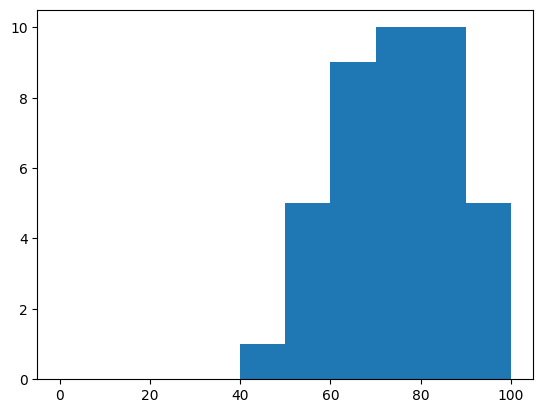

In [ ]:
histograma = [0]*max(lista)
len(histograma)
for i in lista:
  histograma[i-1] += 1

print(histograma)

plt.hist(lista, bins)

plt.show()

#Exercício 2:
Um homem precisava fazer um reparo e comprou 80m de arame por Rs 40,00. Um tempo depois, ele precisou comprar mais 40m e
pagou Rs 45,00. Posteriormente, comprou mais 12m por R$ 50,00.
Quanto ele pagou, em média, por cada metro de arame?

In [ ]:
Media_taxas(40,45,50,80,40,12)/100

1.0227

Utilizando a média das taxas para cada valor apresentado, a média gerada foi R$ 1,02 reais para cada metro do arame.
Para calcular essa média a seguinte algoritmo foi feita pelo programa  Media_taxas:

Total de taxas: 3

Metros do arame: 80, 40, 12

Valor de cada metro respectivamente: 40, 45, 50

Aplicando na fórmula de média das taxas fica:((40+45+50)÷3)÷((80+40+12)÷3)

Calculando essa fórmula a resposta fica: 1.0227


#Exercício 3 - Amplitude

Calcular a amplitude das amostras dos grupos Y, Z, W e V.

Grupo X: 3, 4, 5, 6, 7

Grupo Y: 1, 3, 5, 7, 9

Grupo Z: 5, 5, 5, 5, 5

Grupo W: 3, 5, 5, 5, 7

Grupo V: 3, 5, 5, 6, 6

In [67]:
#Para o grupo X:
Amplitude_X = Amplitude(3,4,5,6,7)
print("Amplitude de X: ", Amplitude_X)
#Para o grupo Y:
Amplitude_Y = Amplitude(1, 3, 5, 7, 9)
print("Amplitude de Y: ", Amplitude_Y)
#Para o grupo Z:
Amplitude_Z = Amplitude(5,5,5,5,5)
print("Amplitude de Z: ", Amplitude_Z)
#Para o grupo W:
Amplitude_W = Amplitude(3,5,5,5,7)
print("Amplitude de W: ", Amplitude_W)
#Para o grupo V:
Amplitude_W = Amplitude(3,5,5,6,6)
print("Amplitude de V: ", Amplitude_W)

Amplitude de X:  4
Amplitude de Y:  8
Amplitude de Z:  0
Amplitude de W:  4
Amplitude de V:  3


Para calular cada amplitude dos grupos dados, foi realizado uma subtraçao entre o maior número do grupo e o menor número do grupo.

Por exemplo, no  grupo W, temos o menor número o 3 e o maior, 7.

Subtraindo esses números fica: 7-3 = 4.

Logo a amplitude de W é 4.

#Exercício 4 - Amplitude




Exercício
Um aplicativo foi desenvolvido para registrar o tempo T que o
celular de um usuário está próximo do celular de outro usuário.
Valores da duração de alguns desses contatos (em segundos):

23,17,18,32,19,27,22,16,24,29

a) Calcule a amplitude dessa amostra.


In [73]:
# amostras na entrada da função amplitude 23,17,18,32,19,27,22,16,24,29
amplitude_amostras = Amplitude(23,17,18,32,19,27,22,16,24,29)
print("A amplitude é: ", amplitude_amostras)

A amplitude é:  16


Para calcular a amplitude da amostra dada, foi necessário primeiro encontrar o mínimo e o máximo valor da lista de números.

Os valores encontrados de máx e mín respectivamente são 32 e 16. Logo a amplitude é 32-16 = 16.


 b) Suponha que dois usuários não se viam há muito tempo e o aplicativo registrou 1200 segundos de duração do contato. A amostra ficou assim:

23,17, 18, 32, 19, 27, 22, 16, 24, 1200

Calcule a amplitude dessa amostra.


O que podemos dizer sobre essa segunda amostra?

In [77]:
Amplitude_amostras2 = Amplitude(23,17, 18, 32, 19, 27, 22, 16, 24, 1200)
print("A amplitude é: ", Amplitude_amostras2)

A amplitude é:  1184


Como houve uma maior duração de tempo de contato, temos uma amplitude maior.

O último valor inserido na lista foi 1200 e é o valor máximo. O mínimo permanece 16.

Calculando a amplitude, temos 1200-16 = 1984.

#Exercício 5 - Desvio Padrão

O analista de redes de uma empresa coletou uma amostra do tempo
(em segundos) de acesso a uma página web que alguns usuários
observaram em dois dias consecutivos. As observações do primeiro dia
foram {45, 74, 56, 98, 32, 97} e as do segundo dia foram {48, 81, 33, 40,
84}. Ache a variância amostral e o desvio-padrão de cada amostra. Faça
uma análise comparativa.

In [89]:
#Para o primeiro dia temos os seguintes valores de variância e desvio padrão:
# primeiro_dia = [45, 74, 56, 98, 32, 97]
variancia_1dia = Variancia(45, 74, 56, 98, 32, 97)
print("Variancia do primeiro dia: ", variancia_1dia)

DP_1dia = Desvio_padrao(45, 74, 56, 98, 32, 97)
print("Desvio padrão do primeiro dia: ", DP_1dia)

print("-----------------------------------------------------------")
#Para o Segundo dia temos os seguintes valores de variância e desvio padrão:
# primeiro_dia = [45, 74, 56, 98, 32, 97]
variancia_2dia = Variancia(48, 81, 33, 40, 84)
print("Variancia do primeiro dia: ", variancia_2dia)

DP_2dia = Desvio_padrao(48, 81, 33, 40, 84)
print("Desvio padrão do primeiro dia: ", DP_2dia)

Variancia do primeiro dia:  748.0
Desvio padrão do primeiro dia:  27.35
-----------------------------------------------------------
Variancia do primeiro dia:  562.7
Desvio padrão do primeiro dia:  23.72


Ao analizarmos os dados, percebemos que temos um acesso a mais ao site pelo primeiro dia.

Isso influenciou no calculo da variância já que no primeiro dia temos um valor maior na variância. Por consequência temos também um valor mais alto no Desvio Padrão do primeiro dia.

No segundo dia, temos menos acesso ao site e por consequência um valor menor da variância e do Desvio Padrão.